<a href="https://colab.research.google.com/github/Ritwick-Dadhich/MyfirstMLproject/blob/main/irisclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
dataset :  (150, 5)
x :  (150, 4)
y :  (150,)
(105, 4) (105, 3)
(45, 4) (45, 3)
Iteration 1, loss = 2.61852097
Iteration 2, loss = 2.57547440
Iteration 3, loss = 2.51925098
Iteration 4, loss = 2.45408253
Iteration 5, loss = 2.38636412
Iteration 6, loss = 2.31959652
Iteration 7, loss = 2.25575019
Iteration 8, loss = 2.19510840
Iteration 9, loss = 2.13937446
Iteration 10, loss = 2.08955533
Iteration 11, loss = 2.04603258
Iteration 12, loss = 2.00934509
Iteration 13, loss = 1.97889819
Iteration 14, loss = 1.95514189
Iteration 15, loss = 1.9

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


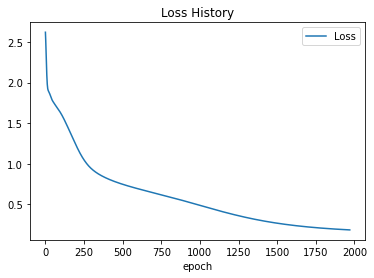

In [5]:
import pandas as pd   #python data analysis library
import numpy as np    #python scientific libray
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()
dataset.head(6)

y = dataset['iris_class']
x = dataset.drop(['iris_class'], axis=1)
print("dataset : ", dataset.shape)
print("x : ", x.shape)
print("y : ", y.shape)

#one hot encoding
y=pd.get_dummies(y)
y.sample(7)

#selective import scikit learn
from sklearn.model_selection import train_test_split

#generate testing and validation set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 as dataset

#convert to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

#print data split for validation
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

#importing our model
from sklearn.neural_network import MLPClassifier

#model initialisation
Model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, alpha=0.01, #try change hidden layer
                      solver='sgd', verbose=1, random_state=121) #try verbode=0 to train without logging

#train our model
h=Model.fit(x_train,y_train)

#use our model to predict
y_pred=Model.predict(x_test)


#scikit for machine learning reporting
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred))  #print summary report
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))  #print confusion matrix
print('accuracy is', accuracy_score(y_pred,y_test)) #print accuracy score

import matplotlib.pyplot as plt
plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])